# 딥러닝 날 코드(Scratch Code)

> 딥러닝 쌩으로 이해하기

## 순방향 연산

- 입력을 주고 출력을 관찰하는 것이 추론, 순방향 연산이다.


### AND

In [1]:
import numpy as np

# 데이터 준비
X = np.array([
	[0,0,1],
	[0,1,1],
	[1,0,1],
	[1,1,1]
])

In [2]:
# 활성화 함수 준비 - sigmoid 함수

def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

In [3]:
# 가중치를 랜덤하게 선택 (원래는 학습이 완료된 가중치를 사용해야 한다.)

W = 2 * np.random.random((1,3)) -1
W

array([[-0.58674101, -0.08683766,  0.88604882]])

In [20]:
np.random.random((1,3))
# 주어진 shape에 따라 [0.0, 1.0) 범위에서 균일하게 분포된 난수를 생성
# (1, 3)은 1행 3열의 2차원 배열을 의미
# 1행 3열의 배열을 생성하고, 각 요소는 0부터 1 사이의 무작위한 실수값으로 채워짐

array([[0.91308576, 0.75447359, 0.96834751]])

In [4]:
X[0,:], X[0,:].shape

(array([0, 0, 1]), (3,))

In [5]:
X[0,:].T

array([0, 0, 1])

In [6]:
# 추론 결과(순방향 연산 결과) : 데이터(x) X 가중치(w)

N = 4
for k in range(N):
    x = X[k, :].T
    v = np.matmul(W, x) #--> 이것이 추론 결과이다.
    y = sigmoid(v)
    print(v)

[0.88604882]
[0.79921116]
[0.29930781]
[0.21247015]


### 지도 학습

- 가중치가 정답을 맞추도록 지도 학습

- 딥러닝 학습의 가장 간단한 절차

	<img src="https://github.com/ElaYJ/supplement/assets/153154981/2b3d7275-8cd7-461c-8a78-d0c753d8238d" width="57%"><br></br>

- 가중치 갱신 방법

	<img src="https://github.com/ElaYJ/supplement/assets/153154981/287d4e01-4516-43c5-942f-a71700ed985a" width="57%"><br></br>

In [7]:
D = np.array([[0], [0], [1], [1]]) #--> 정답 데이터

In [8]:
# 모델의 출력을 계산하는 함수

def calc_output(W, x):
    z = np.matmul(W, x)
    y_hat = sigmoid(z)
    
    return y_hat

In [9]:
# 오차를 계산하는 함수

def calc_error(d, y_hat): #--> d: 정답(label),  y: 출력값(output=sigmoid(v))
    error = d - y_hat
    delta = y_hat * (1-y_hat) * error
    #--> 활성화 함수(sigmoid)의 미분값[y*(1-y)]으로 Gradient 방향과 크기를 잡는다.
    
    return delta

In [10]:
# 시그모이드 미분값

import sympy as sym

z = sym.Symbol('z')
s = 1 / (1 + sym.exp(-z))

sym.diff(s) #--> sigmoid(z)*(1-sigmoid(z))

exp(-z)/(1 + exp(-z))**2

In [11]:
# 한 epoch에 수행되는 W 계산
# Gradient Decent는 X data 전체로 가중치를 계산한다.

def delta_GD(W, X, D, alpha): #--> alpha: running rate
    for k in range(4):
        x = X[k, :].T
        d = D[k] #--> 정답 데이터
        
        y_hat = calc_output(W, x)
        delta = calc_error(d, y_hat)
        
        dW = alpha * delta * x
        W = W + dW
        
    return W

In [12]:
# 가중치를 랜덤하게 초기화하고 학습 시작

W = 2 * np.random.random((1,3)) -1

alpha = 0.9
for epoch in range(10000):
    W = delta_GD(W, X, D, alpha)
    print(W)

[[ 0.76941469 -0.06176263  0.76352725]]
[[ 0.84333263 -0.15438924  0.57169301]]
[[ 0.93273955 -0.23002491  0.4025917 ]]
[[ 1.03303913 -0.28718625  0.25849862]]
[[ 1.13930184 -0.32826348  0.13662891]]
[[ 1.24756488 -0.35693298  0.03241267]]
[[ 1.35509552 -0.37658531 -0.05844157]]
[[ 1.46018602 -0.38984477 -0.1392701 ]]
[[ 1.5618599  -0.39859873 -0.21246309]]
[[ 1.65962416 -0.4041653  -0.27967712]]
[[ 1.7532909  -0.40745817 -0.34205387]]
[[ 1.84285759 -0.40911334 -0.40038999]]
[[ 1.92842983 -0.40957814 -0.45525553]]
[[ 2.01017273 -0.4091715  -0.50707244]]
[[ 2.08828083 -0.40812413 -0.55616501]]
[[ 2.16295981 -0.40660532 -0.60279206]]
[[ 2.23441563 -0.40474096 -0.64716722]]
[[ 2.30284825 -0.40262571 -0.68947195]]
[[ 2.36844825 -0.40033149 -0.72986383]]
[[ 2.43139508 -0.39791331 -0.76848205]]
[[ 2.49185653 -0.39541353 -0.80545108]]
[[ 2.54998864 -0.39286488 -0.84088323]]
[[ 2.60593618 -0.3902927  -0.8748805 ]]
[[ 2.65983317 -0.3877166  -0.90753594]]
[[ 2.71180358 -0.38515175 -0.93893474]]


In [13]:
# 학습 결과 확인

N = 4
for k in range(N):
    x = X[k, :].T
    # v = np.matmul(W, x) #--> 이것이 추론 결과이다.
    # y = sigmoid(v)
    print(calc_output(W, x))

#--> 정답인 0, 0, 1, 1 과 가까운 예측이 나왔다.

[0.01020116]
[0.00829367]
[0.99324275]
[0.99168566]


### XOR

In [14]:
# XOR Data 생성

X = np.array([
	[0,0,1],
	[0,1,1],
	[1,0,1],
	[1,1,1],
])

D = np.array([[0],[1],[1],[0]])

W = 2 * np.random.random((1, 3)) -1

In [15]:
# 학습

alpha = 0.9
for epoch in range(10000): #--> Train
    W = delta_GD(W, X, D, alpha)
    
W

array([[-0.23750569, -0.11875285,  0.11875285]])

In [16]:
# 학습 결과 확인

N = 4
for k in range(N):
    x = X[k, :].T
    print(calc_output(W, x))

#--> 엉망... 학습이 안된 것임. ==> 퍼셉트론의 한계

[0.52965337]
[0.5]
[0.47034663]
[0.44090112]


<br></br>

## 역전파: 역방향 연산

- 다시 새로운 구조로 output 계산 함수를 정의한다.

	<img src="https://github.com/ElaYJ/supplement/assets/153154981/db107b49-b0d3-4ad7-97e3-5e75840c693c" width="67%">

In [22]:
def calc_output(W1, W2, x):
    # 1st. layer
    v1 = np.matmul(W1, x)
    y1 = sigmoid(v1)
    # 2nd. layer
    v = np.matmul(W2, y1)
    y = sigmoid(v)
    
    return y, y1


#### - 출력층의 델타 계산

- 출력층의 오차 델타를 계산해 이전 층으로 전달한다.

	<img src="https://github.com/ElaYJ/supplement/assets/153154981/2a2ea002-64c6-4f0e-a921-eb0ce30829c2" width="57%">

In [21]:
def calc_delta(d, y):
    e = d - y
    delta = y * (1-y) * e
    
    return delta

#### - 은닉층의 델타 계산

- 오차의 역전파

	<img src="https://github.com/ElaYJ/supplement/assets/153154981/7529bc23-7df5-4df5-8f33-b155bb7b0232" width="57%">

In [18]:
def calc_delta1(W2, delta, y1):
    e1 = np.matmul(W2.T, delta)
    delta1 = y1 * (1-y1) * e1
    
    return delta1

#### - 역전파 코드

In [27]:
def backprop_GD(W1, W2, X, D, alpha):
    for k in range(4):
        x = X[k, :].T
        d = D[k]
        
        y, y1 = calc_output(W1, W2, x)
        delta = calc_delta(d, y)
        delta1 = calc_delta1(W2, delta, y1)
        
        dW1 = (alpha * delta1).reshape(4,1) * x.reshape(1,3)
        W1 = W1 + dW1
        
        dW2 = alpha * delta * y1
        W2 = W2 + dW2
        
    return W1, W2

#### - 데이터 준비 : XOR

In [24]:
# XOR Data 생성
X = np.array([
	[0,0,1],
	[0,1,1],
	[1,0,1],
	[1,1,1],
])

D = np.array([[0],[1],[1],[0]])

#### - 가중치 랜덤 초기화

In [25]:
W1 = 2 * np.random.random((4,3)) -1
W2 = 2 * np.random.random((1,4)) -1

#### - 학습

In [28]:
alpha=0.9
for epoch in range(10000):
    W1, W2 = backprop_GD(W1, W2, X, D, alpha)

#### - 학습 결과

In [29]:
for k in range(4):
    x = X[k, :].T
    v1 = np.matmul(W1, x)
    y1 = sigmoid(v1)
    v = np.matmul(W2, y1)
    y = sigmoid(v)
    print(y)

[0.00983638]
[0.98996363]
[0.98736524]
[0.01097364]


### Loss 함수 교체

- cross entropy - 분류에 사용되는 손실 함수

	<img src="https://github.com/ElaYJ/supplement/assets/153154981/1dd2964c-a8c0-4718-8bb8-b7a60a0843aa" width="57%">

In [30]:
# 출력층 손실함수만 cross entropy로 변경
# cross entropy를 미분하면 1이 되므로 오차가 곧 델타가 된다.

def calc_ce_delta(d, y):
    e = d - y
    delta = e
    
    return delta

In [31]:
# 은닉층에서의 델타 
# 은닉층에서는 sigmoid 함수 그대로 사용

def calc_ce_delta1(W2, delta, y1):
    e1 = np.matmul(W2.T, delta)
    delta1 = y1 * (1-y1) * e1
    
    return delta1

In [32]:
# 역전파

def backprop_CE(W1, W2, X, D, alpha):
    for k in range(4):
        x = X[k, :].T
        d = D[k]
        
        y, y1 = calc_output(W1, W2, x)
        delta = calc_ce_delta(d, y)
        delta1 = calc_ce_delta1(W2, delta, y1)
        
        dW1 = (alpha * delta1).reshape(4,1) * x.reshape(1,3)
        W1 = W1 + dW1
        
        dW2 = alpha * delta * y1
        W2 = W2 + dW2
        
    return W1, W2        

In [33]:
W1 = 2 * np.random.random((4,3)) -1
W2 = 2 * np.random.random((1,4)) -1

# 학습
alpha=0.9
for epoch in range(10000):
    W1, W2 = backprop_CE(W1, W2, X, D, alpha)

In [34]:
# 학습 결과
for k in range(4):
    x = X[k, :].T
    v1 = np.matmul(W1, x)
    y1 = sigmoid(v1)
    v = np.matmul(W2, y1)
    y = sigmoid(v)
    print(y) #--> 학습 결과가 더 좋아 졌다.

[3.86249712e-05]
[0.9997501]
[0.99991576]
[0.00038234]


<br></br>

## 예제. 숫자 맞추기

- 숫자 맞추기

	<img src="https://github.com/ElaYJ/supplement/assets/153154981/2b6597d8-0ee6-4760-9e25-c092f7ed3948" width="57%">

In [52]:
# import numpy as np
import matplotlib.pyplot as plt
from tqdm import notebook


#### - SoftMax 함수

In [42]:
def SoftMax(x):
    x = np.subtract(x, np.max(x)) #--> prevent overflow (x값을 단순히 왼쪽(작은 값)으로 shift할 뿐 결과에 영향을 주지 않는다.)
    ex_y = np.exp(x) #--> y가 지수승으로 증가하므로 x의 값을 낮춰준다.
    
    return ex_y / np.sum(ex_y)

#### - Train Data

In [38]:
# 훈련용 데이터 준비

X = np.zeros((5, 5, 5))
X[:, :, 0] = [[0,1,1,0,0],[0,0,1,0,0],[0,0,1,0,0],[0,0,1,0,0],[0,1,1,1,0]]
X[:, :, 1] = [[1,1,1,1,0],[0,0,0,0,1],[0,1,1,1,0],[1,0,0,0,0],[1,1,1,1,1]]
X[:, :, 2] = [[1,1,1,1,0],[0,0,0,0,1],[0,1,1,1,0],[0,0,0,0,1],[1,1,1,1,0]]
X[:, :, 3] = [[0,0,0,1,0],[0,0,1,1,0],[0,1,0,1,0],[1,1,1,1,1],[0,0,0,1,0]]
X[:, :, 4] = [[1,1,1,1,1],[1,0,0,0,0],[1,1,1,1,0],[0,0,0,0,1],[1,1,1,1,0]]

D = np.array([[[1,0,0,0,0]],[[0,1,0,0,0]],[[0,0,1,0,0]],[[0,0,0,1,0]],[[0,0,0,0,1]]]) #--> One Hot Encoding

In [39]:
np.zeros((5, 5, 5)) #--> 5x5 5장

array([[[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]]])

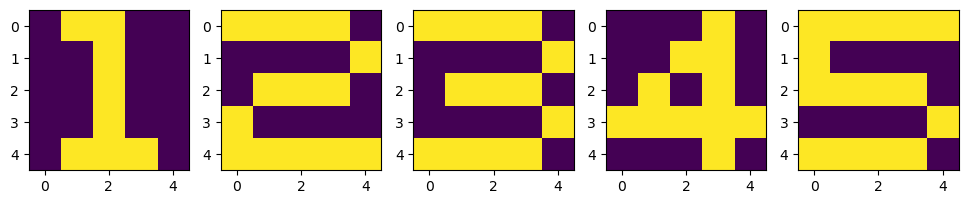

In [40]:
plt.figure(figsize=(12,4))
for n in range(5):
    plt.subplot(1,5, n+1)
    plt.imshow(X[:,:,n])
plt.show()

#### - ReLU 함수

In [41]:
def ReLU(x):
    return np.maximum(0,x) #--> 0과 x 중 큰 값

In [47]:
# ReLU를 이용한 정방향 OUTPUT 계산

def calc_output_ReLU(W1, W2, W3, W4, x):
    v1 = np.matmul(W1, x)
    y1 = ReLU(v1)
    v2 = np.matmul(W2, y1)
    y2 = ReLU(v2)
    v3 = np.matmul(W3, y2)
    y3 = ReLU(v3)
    v = np.matmul(W4, y3)
    y = SoftMax(v)
    
    return y, v1, v2, v3, y1, y2, y3

In [48]:
# 역전파

def backpropagation_ReLU(d, y, W2, W3, W4, v1, v2, v3):
    # 출력단 error
    e = d - y
    delta = e
    
    # layer 3
    e3 = np.matmul(W4.T, delta)
    delta3 = (v3 > 0) * e3
    
    # layer 2
    e2 = np.matmul(W3.T, delta3)
    delta2 = (v2 > 0) * e2
    
    # layer 1
    e1 = np.matmul(W2.T, delta2)
    delta1 = (v1 > 0) * e1
    
    return delta, delta1, delta2, delta3
        

In [49]:
# 가중치 계산 (epoch를 돌 때마다 계산 됨)

def calc_weights(alpha, delta, delta1, delta2, delta3, y1, y2, y3, x, W1, W2, W3, W4):
    dW4 = alpha * delta * y3.T
    W4 = W4 + dW4
    
    dW3 = alpha * delta3 * y2.T
    W3 = W3 + dW3
    
    dW2 = alpha * delta2 * y1.T
    W2 = W2 + dW2
    
    dW1 = alpha * delta1 * x.T
    W1 = W1 + dW1
    
    return W1, W2, W3, W4

In [50]:
# 가중치 업데이트 - Gradient Decent

def DeepReLU(W1, W2, W3, W4, X, D, alpha):
    for k in range(5):
        x = np.reshape(X[:,:,k], (25,1)) #--> flatten (5x5를 펼치는 것)
        d = D[k,:].T
        
        y, v1, v2, v3, y1, y2, y3 = calc_output_ReLU(W1, W2, W3, W4, x)
        delta, delta1, delta2, delta3 = backpropagation_ReLU(d, y, W2, W3, W4, v1, v2, v3)
        W1, W2, W3, W4 = calc_weights(alpha, delta, delta1, delta2, delta3, y1, y2, y3, x, W1, W2, W3, W4)
    
    return W1, W2, W3, W4

#### - 학습

In [53]:
# 학습

# 25(5x5) -> 20 -> 20 -> 5(No.1~5)
W1 = 2 * np.random.random((20,25)) -1
W2 = 2 * np.random.random((20,20)) -1
W3 = 2 * np.random.random((20,20)) -1
W4 = 2 * np.random.random((5,20)) -1

alpha = 0.01
for epoch in notebook.tqdm(range(10000)):
    W1, W2, W3, W4 = DeepReLU(W1, W2, W3, W4, X, D, alpha)

  0%|          | 0/10000 [00:00<?, ?it/s]

In [56]:
# 훈련 데이터 검증 함수

def verify_algorithm(x, W1, W2, W3, W4):
    v1 = np.matmul(W1, x)
    y1 = ReLU(v1)
    
    v2 = np.matmul(W2, y1)
    y2 = ReLU(v2)
    
    v3 = np.matmul(W3, y2)
    y3 = ReLU(v3)
    
    v = np.matmul(W4, y3)
    y = SoftMax(v)
    
    return y

In [57]:
# 결과 확인 - Training Data

N = 5
for k in range(N):
    x = np.reshape(X[:,:,k], (25,1))
    y = verify_algorithm(x, W1, W2, W3, W4)
    
    print("Y = {}:".format(k+1))
    print(np.argmax(y, axis=0)+1) #--> 최대값 인덱스 가져오기
    print(y)
    print('----------------------')

Y = 1:
[1]
[[9.99986042e-01]
 [1.02076597e-09]
 [1.20530469e-05]
 [1.90363419e-06]
 [1.70510444e-12]]
----------------------
Y = 2:
[2]
[[4.28557764e-06]
 [9.99964761e-01]
 [2.89670920e-05]
 [1.93498756e-06]
 [5.14957876e-08]]
----------------------
Y = 3:
[3]
[[4.97202146e-06]
 [2.23160232e-05]
 [9.99946399e-01]
 [4.34135073e-06]
 [2.19712276e-05]]
----------------------
Y = 4:
[4]
[[2.59263042e-08]
 [5.19702797e-06]
 [7.70529975e-06]
 [9.99987072e-01]
 [3.86947524e-11]]
----------------------
Y = 5:
[5]
[[5.36174712e-06]
 [2.17257522e-08]
 [1.92445122e-05]
 [1.87015689e-06]
 [9.99973502e-01]]
----------------------


#### - Test Data

In [69]:
# 테스트 데이터 만들기

X_test = np.zeros((5, 5, 5))
X_test[:, :, 0] = [[0,0,0,0,0],[0,1,0,0,0],[1,0,1,0,0],[0,0,1,0,0],[0,1,1,1,0]]
X_test[:, :, 1] = [[1,1,1,1,0],[0,0,0,0,1],[0,1,1,1,0],[1,0,0,0,0],[1,1,1,0,0]]
X_test[:, :, 2] = [[1,1,1,1,0],[0,0,0,0,0],[0,1,1,1,0],[0,0,0,0,1],[1,1,1,1,0]]
X_test[:, :, 3] = [[0,0,0,1,0],[0,0,1,1,0],[0,1,0,0,0],[1,1,1,0,1],[0,0,0,1,0]]
X_test[:, :, 4] = [[0,1,1,1,1],[1,1,0,0,0],[1,1,1,1,0],[0,0,0,1,1],[1,1,1,1,0]]

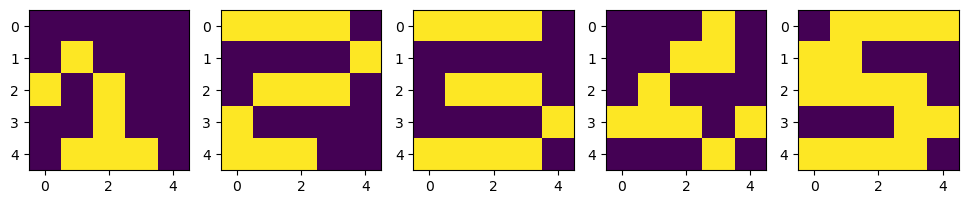

In [70]:
plt.figure(figsize=(12,4))
for n in range(5):
    plt.subplot(1,5, n+1)
    plt.imshow(X_test[:,:,n])
plt.show()

In [71]:
# Test Data 결과 확인

learning_result = [0,0,0,0,0]
for k in range(N):
    x = np.reshape(X_test[:,:,k], (25,1))
    y = verify_algorithm(x, W1, W2, W3, W4)
    
    learning_result[k] = np.argmax(y, axis=0) #--> 최대값 인덱스 가져오기    
    print("Y = {}:".format(k+1))
    print(learning_result[k]+1)
    print(y)
    print('----------------------')

Y = 1:
[3]
[[3.88109688e-01]
 [2.80430728e-05]
 [5.96880650e-01]
 [1.49811623e-02]
 [4.56629818e-07]]
----------------------
Y = 2:
[2]
[[1.10352304e-05]
 [9.88185036e-01]
 [1.15697758e-02]
 [2.25836072e-04]
 [8.31653197e-06]]
----------------------
Y = 3:
[3]
[[3.78281370e-05]
 [5.86867581e-05]
 [9.99810416e-01]
 [7.31510811e-05]
 [1.99176269e-05]]
----------------------
Y = 4:
[4]
[[2.17492972e-09]
 [2.63726801e-08]
 [5.59625497e-07]
 [9.99999412e-01]
 [1.12789698e-14]]
----------------------
Y = 5:
[5]
[[3.08371169e-03]
 [7.76007784e-08]
 [4.71352086e-05]
 [5.59467248e-06]
 [9.96863481e-01]]
----------------------


In [72]:
learning_result

[array([2], dtype=int64),
 array([1], dtype=int64),
 array([2], dtype=int64),
 array([3], dtype=int64),
 array([4], dtype=int64)]

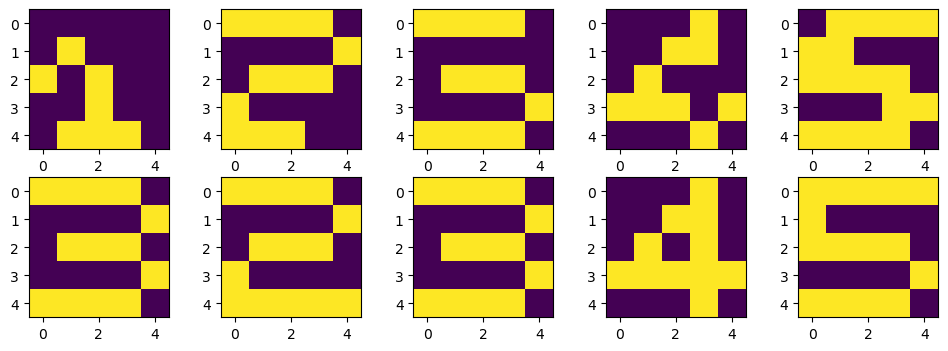

In [73]:
plt.figure(figsize=(12,4))

for n in range(5):
    plt.subplot(2,5, n+1)
    plt.imshow(X_test[:,:,n])    
    plt.subplot(2,5, n+6)
    plt.imshow(X[:,:,learning_result[n][0]])
    
plt.show()

#### - dropout 함수

In [99]:
def Dropout(y, ratio):
    ym = np.zeros_like(y) #--> y와 같은 크기의 제로 만들기
    
    num = round(y.size * (1-ratio))
    idx = np.random.choice(y.size, num, replace=False)
    ym[idx] = 1.0 / (1.0-ratio)
    
    return ym

In [100]:
Dropout(sigmoid(np.matmul(W1, np.reshape(X[:,:,0], (25,1)))), 0.2)

array([[1.25],
       [1.25],
       [1.25],
       [1.25],
       [1.25],
       [1.25],
       [0.  ],
       [0.  ],
       [1.25],
       [1.25],
       [1.25],
       [1.25],
       [0.  ],
       [1.25],
       [1.25],
       [1.25],
       [1.25],
       [1.25],
       [0.  ],
       [1.25]])

In [90]:
# dropout을 적용해 정방향 출력을 계산

def calc_output_Dropout(W1, W2, W3, W4, x):
    v1 = np.matmul(W1, x)
    y1 = sigmoid(v1)
    y1 = y1 * Dropout(y1,0.2)
    
    v2 = np.matmul(W2, y1)
    y2 = sigmoid(v2)
    y2 = y2 * Dropout(y2,0.2)
    
    v3 = np.matmul(W3, y2)
    y3 = sigmoid(v3)
    y3 = y3 * Dropout(y3,0.2)
    
    v = np.matmul(W4, y3)
    y = SoftMax(v)
    
    return y, y1, y2, y3, v1, v2, v3

In [91]:
# 역전파로 델타를 계산

def backpropagation_Dropout(d, y, y1, y2, y3, W2, W3, W4, v1, v2, v3):
    # 출력단 error
    e = d - y
    delta = e
    
    # layer 3
    e3 = np.matmul(W4.T, delta)
    delta3 = y3 * (1-y3) * e3
    
    # layer 2
    e2 = np.matmul(W3.T, delta3)
    delta2 = y2 * (1-y2) * e2
    
    # layer 1
    e1 = np.matmul(W2.T, delta2)
    delta1 = y1 * (1-y1) * e1
    
    return delta, delta1, delta2, delta3

In [92]:
# Dropout을 적용해 다시 계산
# 가중치 업데이트 - Gradient Decent

def DeepDropout(W1, W2, W3, W4, X, D, alpha):
    for k in range(5):
        x = np.reshape(X[:,:,k], (25,1)) #--> flatten (5x5를 펼치는 것)
        d = D[k,:].T
        
        y, v1, v2, v3, y1, y2, y3 = calc_output_Dropout(W1, W2, W3, W4, x)
        delta, delta1, delta2, delta3 = backpropagation_Dropout(d, y, y1, y2, y3, W2, W3, W4, v1, v2, v3)
        W1, W2, W3, W4 = calc_weights(alpha, delta, delta1, delta2, delta3, y1, y2, y3, x, W1, W2, W3, W4)
    
    return W1, W2, W3, W4

In [98]:
# 다시 학습

# 25(5x5) -> 20 -> 20 -> 5(No.1~5)
W1 = 2 * np.random.random((20,25)) -1
W2 = 2 * np.random.random((20,20)) -1
W3 = 2 * np.random.random((20,20)) -1
W4 = 2 * np.random.random((5,20)) -1

alpha = 0.01
for epoch in notebook.tqdm(range(10000)):
    W1, W2, W3, W4 = DeepDropout(W1, W2, W3, W4, X, D, alpha)

  0%|          | 0/10000 [00:00<?, ?it/s]

C:\Users\happy\AppData\Local\Temp\ipykernel_23652\1422785469.py:4: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp(-x))
C:\Users\happy\AppData\Local\Temp\ipykernel_23652\1484202292.py:17: RuntimeWarning: overflow encountered in matmul
  e1 = np.matmul(W2.T, delta2)
C:\Users\happy\AppData\Local\Temp\ipykernel_23652\1484202292.py:18: RuntimeWarning: overflow encountered in multiply
  delta1 = y1 * (1-y1) * e1
C:\Users\happy\AppData\Local\Temp\ipykernel_23652\4217870478.py:10: RuntimeWarning: overflow encountered in multiply
  dW2 = alpha * delta2 * y1.T
C:\Users\happy\AppData\Local\Temp\ipykernel_23652\4217870478.py:13: RuntimeWarning: invalid value encountered in multiply
  dW1 = alpha * delta1 * x.T
C:\Users\happy\AppData\Local\Temp\ipykernel_23652\3370001408.py:4: RuntimeWarning: invalid value encountered in matmul
  v1 = np.matmul(W1, x)


In [94]:
# 훈련 데이터 검증 함수

def verify_algorithm(x, W1, W2, W3, W4):
    v1 = np.matmul(W1, x)
    y1 = sigmoid(v1)
    
    v2 = np.matmul(W2, y1)
    y2 = sigmoid(v2)
    
    v3 = np.matmul(W3, y2)
    y3 = sigmoid(v3)
    
    v = np.matmul(W4, y3)
    y = SoftMax(v)
    
    return y

In [95]:
# Test Data 결과 확인

N = 5
learning_result = [0,0,0,0,0]
for k in range(N):
    x = np.reshape(X_test[:,:,k], (25,1))
    y = verify_algorithm(x, W1, W2, W3, W4)
    
    learning_result[k] = np.argmax(y, axis=0) #--> 최대값 인덱스 가져오기
    
    print("Y = {}:".format(k+1))
    print(learning_result[k]+1)
    print(y)
    print('----------------------')

Y = 1:
[1]
[[nan]
 [nan]
 [nan]
 [nan]
 [nan]]
----------------------
Y = 2:
[1]
[[nan]
 [nan]
 [nan]
 [nan]
 [nan]]
----------------------
Y = 3:
[1]
[[nan]
 [nan]
 [nan]
 [nan]
 [nan]]
----------------------
Y = 4:
[1]
[[nan]
 [nan]
 [nan]
 [nan]
 [nan]]
----------------------
Y = 5:
[1]
[[nan]
 [nan]
 [nan]
 [nan]
 [nan]]
----------------------


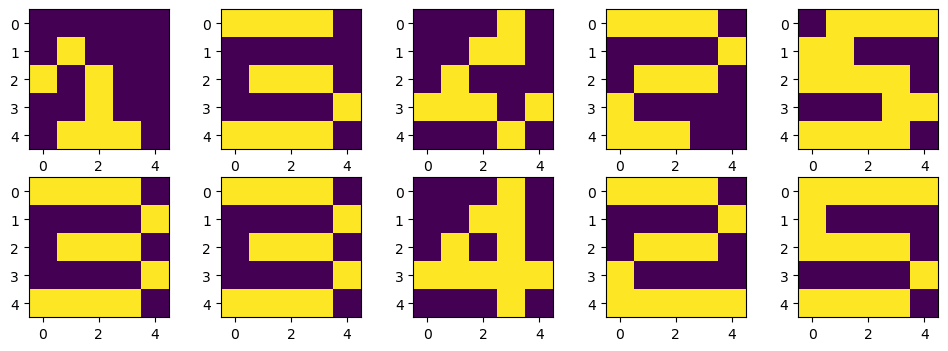

In [ ]:
plt.figure(figsize=(12,4))

for n in range(5):
    plt.subplot(2,5, n+1)
    plt.imshow(X_test[:,:,n])    
    plt.subplot(2,5, n+6)
    plt.imshow(X[:,:,learning_result[n][0]])
    
plt.show()

THE END~!